In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import plotly.graph_objects as go

%matplotlib inline

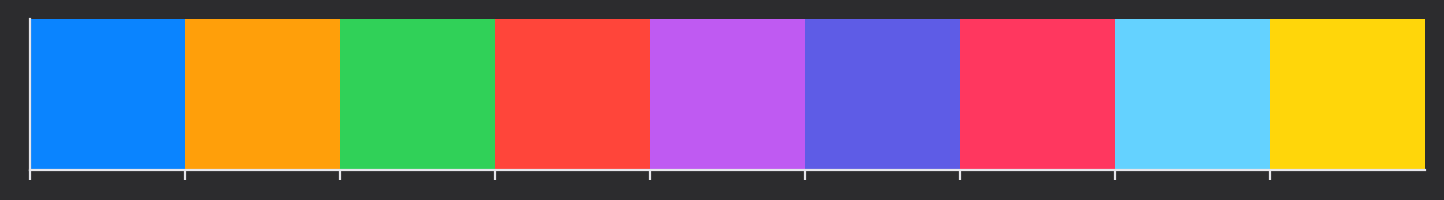

In [7]:
raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]
raw_darks=[
    (44, 44, 46)
]
raw_lights=[
    (229, 229, 234)
]
miscellaneous={
    'blue':'#0f71d4',
    'green':'#14b827',
    'red':'#cf0c0c'
}

dark_palette=np.array(raw_dark_palette)/255
darks=np.array(raw_darks)/255
lights=np.array(raw_lights)/255

#rcparams
dark_color=darks[-1]
light_color=lights[-1]

mpl.rcParams['axes.prop_cycle']=cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']=dark_color
mpl.rcParams['figure.edgecolor']=dark_color
mpl.rcParams['axes.facecolor']=dark_color
mpl.rcParams['text.color']=light_color
mpl.rcParams['axes.labelcolor']=light_color
mpl.rcParams['axes.edgecolor']=light_color
mpl.rcParams['xtick.color']=light_color
mpl.rcParams['ytick.color']=light_color
mpl.rcParams['figure.dpi']=200
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

sns.palplot(dark_palette)

In [11]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [3]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [5]:
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

### Now we take a look at the stats of the data

In [12]:
train.describe().T.style.bar(subset=['mean'],color=miscellaneous['blue']).background_gradient(subset=['std'],cmap='Reds').background_gradient(subset=['50%'],cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
feature_0,100000.000000,0.257830,0.929033,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,100000.000000,0.431720,1.977862,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,100000.000000,0.114130,0.519584,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,100000.000000,0.590550,1.844558,0.000000,0.000000,0.000000,0.000000,26.000000
feature_4,100000.000000,0.599770,2.785531,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,0.160820,0.601149,0.000000,0.000000,0.000000,0.000000,10.000000
feature_6,100000.000000,0.731490,2.343465,0.000000,0.000000,0.000000,0.000000,27.000000
feature_7,100000.000000,1.228920,2.692732,0.000000,0.000000,0.000000,1.000000,31.000000
feature_8,100000.000000,0.903350,3.415258,0.000000,0.000000,0.000000,0.000000,39.000000
feature_9,100000.000000,0.940120,1.904172,0.000000,0.000000,0.000000,1.000000,17.000000


In [10]:
test.describe().T.style.bar(subset=['mean'],color=miscellaneous['blue']).background_gradient(subset=['std'],cmap='Reds').background_gradient(subset=['50%'],cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
feature_0,50000.000000,0.254620,0.910607,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,50000.000000,0.443480,2.004536,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,50000.000000,0.116720,0.524807,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,50000.000000,0.584440,1.814083,0.000000,0.000000,0.000000,0.000000,25.000000
feature_4,50000.000000,0.612640,2.819580,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,50000.000000,0.161500,0.605760,0.000000,0.000000,0.000000,0.000000,9.000000
feature_6,50000.000000,0.746000,2.352495,0.000000,0.000000,0.000000,0.000000,25.000000
feature_7,50000.000000,1.238040,2.728055,0.000000,0.000000,0.000000,1.000000,29.000000
feature_8,50000.000000,0.886440,3.364154,0.000000,0.000000,0.000000,0.000000,35.000000
feature_9,50000.000000,0.941920,1.913358,0.000000,0.000000,0.000000,1.000000,16.000000


## Observations
It can be seen from the above tables that for a majority of features the median is zero. For the test data the range for some features may be different.

In [14]:
def change_color(x):
    if x<0:
        color='red'
    elif x>0:
        color='green'
    else:
        color='white'
    return f'color:{color}'

(train.describe()-test.describe())[test.columns].T.iloc[:,1:].style.bar(subset=['mean','std'],align='mid',color=[miscellaneous['red'],miscellaneous['green']]).applymap(change_color,['min','max'])

,mean,std,min,25%,50%,75%,max
feature_0,0.003210,0.018426,0.000000,0.000000,0.000000,0.000000,0.000000
feature_1,-0.011760,-0.026675,0.000000,0.000000,0.000000,0.000000,0.000000
feature_2,-0.002590,-0.005223,0.000000,0.000000,0.000000,0.000000,0.000000
feature_3,0.006110,0.030476,0.000000,0.000000,0.000000,0.000000,1.000000
feature_4,-0.012870,-0.034049,0.000000,0.000000,0.000000,0.000000,0.000000
feature_5,-0.000680,-0.004611,0.000000,0.000000,0.000000,0.000000,1.000000
feature_6,-0.014510,-0.009031,0.000000,0.000000,0.000000,0.000000,2.000000
feature_7,-0.009120,-0.035323,0.000000,0.000000,0.000000,0.000000,2.000000
feature_8,0.016910,0.051104,0.000000,0.000000,0.000000,0.000000,4.000000
feature_9,-0.001800,-0.009186,0.000000,0.000000,0.000000,0.000000,1.000000


As can be seen the test and train data are very similar. Only some difference in their ranges.

In [36]:
labels=sorted(train.target.unique())
values=train.groupby('target').size()

fig=go.Figure(data=[go.pie(labels=labels,values=values,hole=0.5)])
fig.show()

TypeError: 'module' object is not callable